# Project 5: Job Satisfaction
## Data Cleaning and Analysis

In this project, we will use more various data cleaning analysis methods to perform data visualization of job satisfaction based on institutes employee exit surveys.

Datasets used in this project from:
* [Employee Exit Survey - DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) 
* [TAFE Employee Exit Survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

We will first import datasets, and peek into it for further cleaning and analysis:

In [1]:
import numpy as np
import pandas as pd
dete = pd.read_csv('dete_survey.csv',na_values='Not Stated')
tafe = pd.read_csv('tafe_survey.csv')

In [2]:
dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We will start cleaning both datasets seperately and keep needed informations only for analysis:

In [4]:
dete['Dissatisfication']=dete[['Job dissatisfaction', 'Dissatisfaction with the department','Physical work environment', 
                               'Lack of recognition','Lack of job security', 'Work location']].any(axis=1)
dete['Experience']=(dete['Cease Date'].str.split('/').str[-1].astype(float)-dete['DETE Start Date'].astype(float))
dete=dete.loc[dete['SeparationType'].str.startswith('Resignation'),['Dissatisfication','Experience']]
dete.head()

,Dissatisfication,Experience
3,False,7.0
5,False,18.0
8,False,3.0
9,True,15.0
11,False,3.0


In [5]:
tafe['Contributing Factors. Dissatisfaction']=tafe['Contributing Factors. Dissatisfaction'].str.istitle()
tafe['Contributing Factors. Job Dissatisfaction']=tafe['Contributing Factors. Job Dissatisfaction'].str.istitle()
tafe['Dissatisfication']=tafe[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1)
tafe['Experience']=tafe['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].str.extract(r'([0-9]+)').astype(float)
tafe=tafe.loc[tafe['Reason for ceasing employment']=='Resignation',['Dissatisfication','Experience']]
tafe.head()

,Dissatisfication,Experience
3,False,NaN
4,False,3.0
5,False,7.0
6,False,3.0
7,False,3.0


Aftre cleaning datasets seperately, we will concat both datasets into one dataframe and use a function to categorize values, then pivot the dataframe into a more effective table for analysis:

In [6]:
df=pd.concat([dete,tafe],ignore_index=True)
df.head()

,Dissatisfication,Experience
0,False,7.0
1,False,18.0
2,False,3.0
3,True,15.0
4,False,3.0


In [7]:
def correction(x):
    if type(x)==bool:
        if x==False:
            return "Satisfied"
        else:
            return "Dissatisfied"
    elif x >= 11:
        return "Veteran"
    elif 7 <= x < 11:
        return "Established"
    elif 3 <= x < 7:
        return "Experienced"
    elif pd.isnull(x):
        return "Unknown"
    else:
        return "New"
    
df = df.applymap(correction)
#df['Total']=1
df.head()

,Dissatisfication,Experience
0,Satisfied,Established
1,Satisfied,Veteran
2,Satisfied,Experienced
3,Dissatisfied,Veteran
4,Satisfied,Experienced


In [8]:
df=df.pivot_table(values='Dissatisfication',index='Experience',columns='Dissatisfication',aggfunc=len)
df

Dissatisfication,Dissatisfied,Satisfied
Experience,,
Established,27,35
Experienced,38,134
New,36,157
Unknown,15,73
Veteran,41,95


We will finally plot the cleaned dataframe using a simple bar chart to visualize job satisfaction of exit employees.

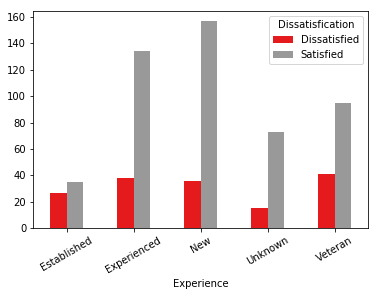

In [10]:
df.plot.bar(rot=30,colormap='Set1')

End. Thankyou!